# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [3]:
df = pd.read_csv("cement_slump.csv")

# EDA and Graphical analysis

In [4]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [6]:
df.info()
# 104 Attributes, 7 independent variables,(Features) 3 dependent variables. Target variable is 'Compressive strength'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [7]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [12]:
df['Compressive Strength (28-day)(Mpa)']

0     34.990
1     41.140
2     41.810
3     42.080
4     26.820
       ...  
98    49.970
99    50.230
100   50.500
101   49.170
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

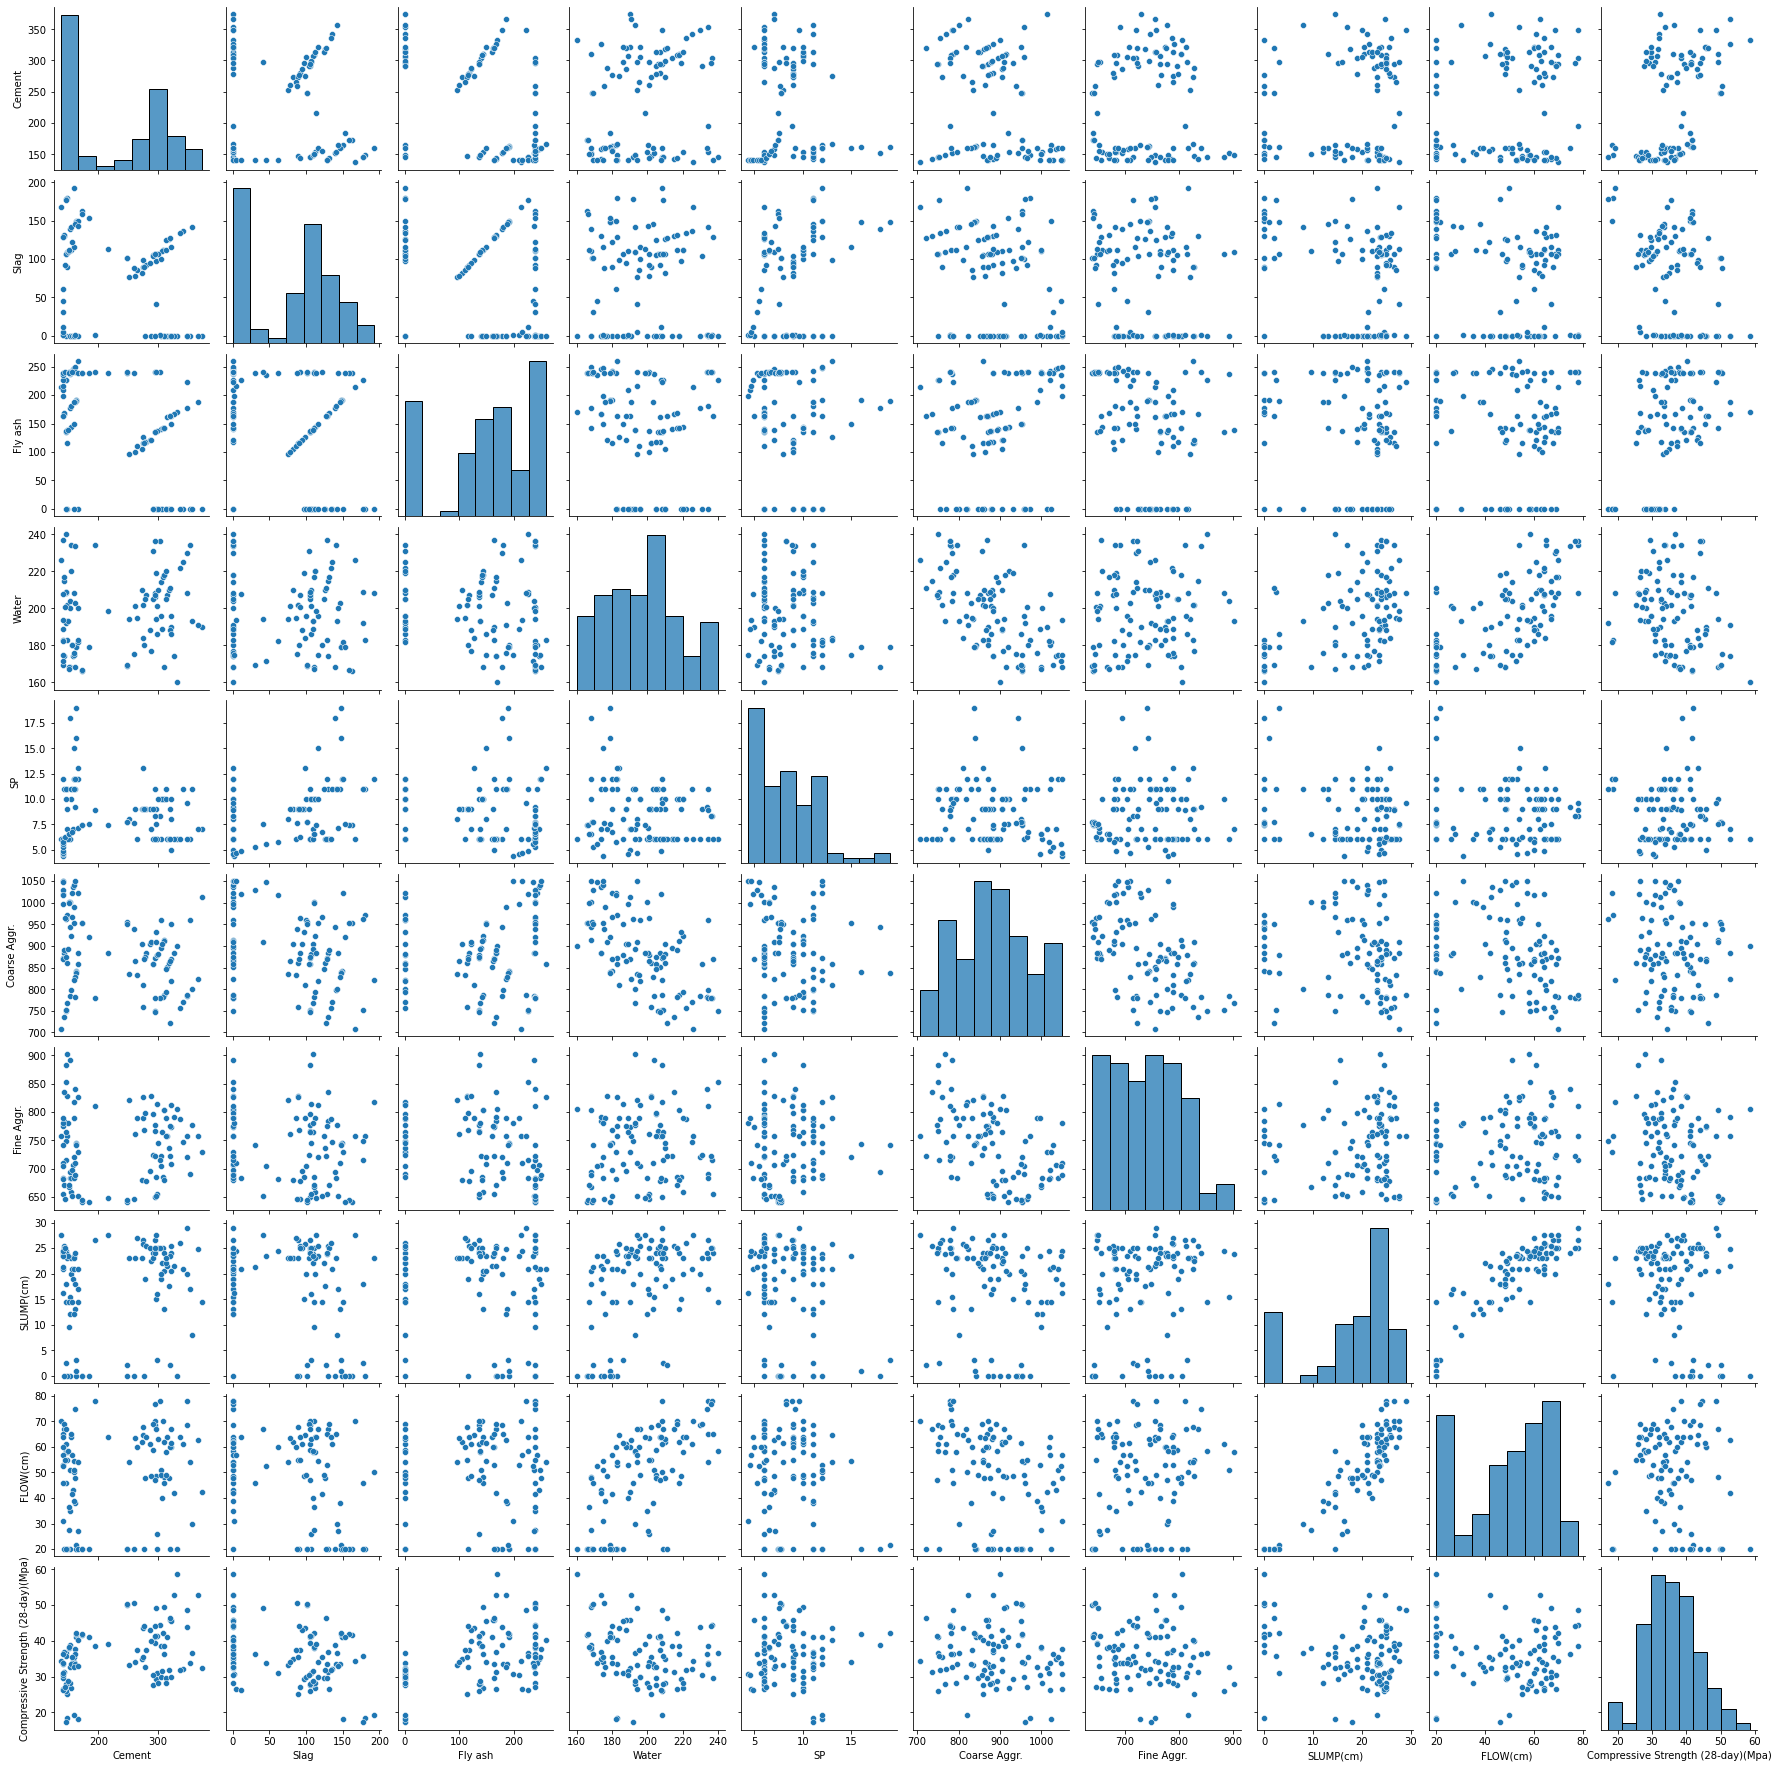

In [8]:
sns.pairplot(df)

# Data Preprocessing 

### Features and target variable

In [18]:
df = df.drop(columns = ['SLUMP(cm)', 'FLOW(cm)' ]) # Dropping the other two dependent variables.
# 104 Attributes, 7 independent variables,(Features). Target variable is 'Compressive strength'

In [20]:
for i in df.drop(columns = ['Compressive Strength (28-day)(Mpa)' ]):§
    print(f"corr between strength and {i:<12}:  {df['Compressive Strength (28-day)(Mpa)'].corr(df[i])}")

corr between strength and Cement      :  0.445656142563621
corr between strength and Slag        :  -0.33152226429150117
corr between strength and Fly ash     :  0.44437968506874465
corr between strength and Water       :  -0.2543201492378115
corr between strength and SP          :  -0.037909280335955774
corr between strength and Coarse Aggr.:  -0.16060986575287395
corr between strength and Fine Aggr.  :  -0.15453179659662755


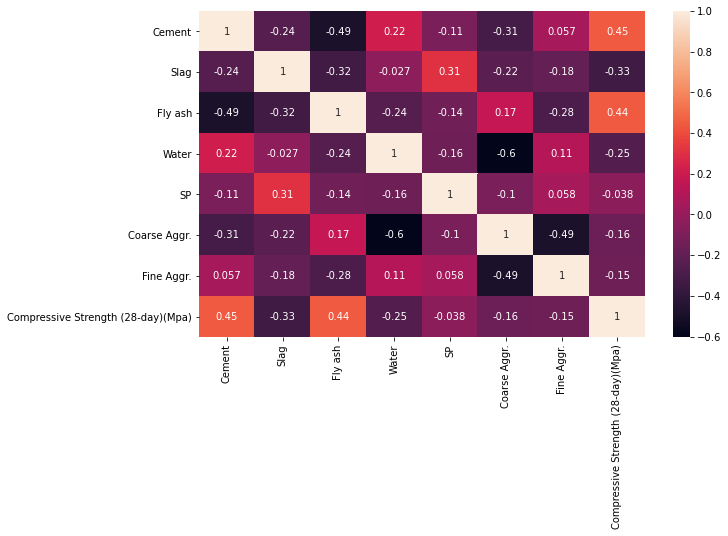

In [23]:
sns.heatmap(df.corr(), annot=True);
#Sp is very low correlated with the target value but it is not dropped here.

In [66]:
#SCORING 
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### Splitting data into training and testing

In [31]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis =1)
y = df['Compressive Strength (28-day)(Mpa)']


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)

## Scaling

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [72]:
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_test_scaled = scaler.transform(X_test)

##  1. Model Building (Linear Regression)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_train_pred_lr = lr.predict(X_train_scaled)
ls = train_val(y_train, y_train_pred_lr, y_test, y_pred_lr, "linear")
ls

,linear_train,linear_test
R2,1.000,1.000
mae,0.000,0.000
mse,0.000,0.000
rmse,0.000,0.000


In [75]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
30,45.820,45.820,0.000
67,40.340,40.340,0.000
62,28.290,28.290,0.000
47,43.010,43.010,0.000
42,33.510,33.510,0.000
40,35.660,35.660,0.000
90,35.520,35.520,0.000
45,31.770,31.770,0.000
10,26.020,26.020,0.000
0,34.990,34.990,0.000


### 1.2 Model Evaluation

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [60]:
y_pred = model_linreg.predict(X_test_scaled)

In [63]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [64]:
eval_metric(y_test, y_pred)

Model performance:
--------------------------
R2_score 	: 1.0
MAE 		: 8.797195776077431e-15
MSE 		: 1.2501567107502511e-28
RMSE 		: 1.1181040697315484e-14


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [78]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

alpha_space = np.linspace(0.01, 1, 100)
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 5, scoring = "neg_root_mean_squared_error")
ridge_cv_model.fit(X_train_scaled, y_train)
y_pred_rcv = ridge_cv_model.predict(X_test_scaled)
y_train_pred_rcv = ridge_cv_model.predict(X_train_scaled)
rcs = train_val(y_train, y_train_pred_rcv, y_test, y_pred_rcv, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,1.000,1.000
mae,0.002,0.002
mse,0.000,0.000
rmse,0.003,0.002


## 2.2 Lasso (Apply and evalute)

In [80]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 
lasso_cv_model.fit(X_train_scaled, y_train)
y_pred_lcv = lasso_cv_model.predict(X_test_scaled)  
y_train_pred_lcv = lasso_cv_model.predict(X_train_scaled)
lcs = train_val(y_train, y_train_pred_lcv, y_test, y_pred_lcv, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,1.000,1.000
mae,0.008,0.007
mse,0.000,0.000
rmse,0.010,0.009


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [81]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.888,0.889
mae,2.099,1.960
mse,7.067,5.607
rmse,2.658,2.368
